# KNN

In [21]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# KNN works by calculating distances to all training points and predicting
# the label based on the majority class among the k nearest points.
# This KNN class definition has a constructor to initialize k, stores training
# data using fit(), computes distances, and predicts labels for new points.
class KNN:
    def __init__(self, k=3):
        self.k = k  # number of neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

    def predict_point(self, x):
        distances = [self._distance(x, t) for t in self.X_train]
        idx = np.argsort(distances)[:self.k]
        votes = self.y_train[idx]
        return Counter(votes).most_common(1)[0][0]

    def predict(self, X):
        return np.array([self.predict_point(x) for x in X])

In [22]:
# Generate simple 2D data
X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.0)

In [23]:
# Fit KNN
knn = KNN(k=5)
knn.fit(X, y)

In [ ]:
# Create a meshgrid
# These points will be used to predict labels and draw the decision boundary.
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]


In [25]:
# Predict for every point in the grid
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

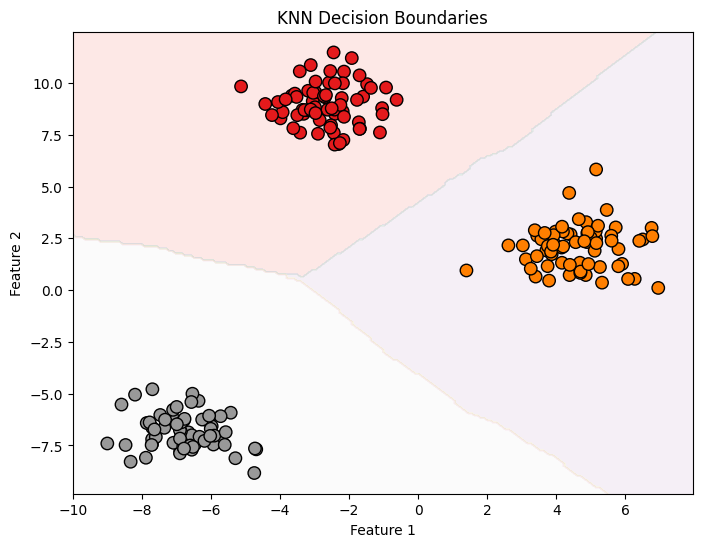

In [ ]:
# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=80, cmap=plt.cm.Set1)
plt.title("KNN Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()